In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [15]:
df=pd.read_excel("C:/Users/Zaineb/Desktop/METEO/PFE/OUTPUT/Indices_2021071600.xlsx")
df

,STATION,ICL,IH,IS,IPI,ICD,IFM,CONCLUSION
0,la_marsa,90.109003,147.079541,8.690,17.853108,143.905633,61.630888,DANGER SEVERE
1,tunis_ville,95.126521,186.501435,9.680,16.958635,182.160561,63.644210,DANGER SEVERE
2,sidi_hsine,95.332649,193.656367,9.482,14.995738,189.076166,56.793545,DANGER MODERE
3,ariana_ville,94.521514,181.534078,9.338,17.262020,177.346773,64.317622,DANGER SEVERE
4,kalat_andalous,93.152206,178.770338,9.050,21.360445,174.665420,79.242852,DANGER SEVERE
...,...,...,...,...,...,...,...,...
103,tataouine,94.661635,217.409985,9.572,21.528023,212.005192,83.349719,DANGER SEVERE
104,thhiba,94.828698,228.569908,9.752,25.622718,222.757602,99.905264,DANGER TRES SEVERE
105,remada,95.165317,229.692874,9.770,29.676998,223.838769,115.785001,DANGER TRES SEVERE
106,el_borma,99.430027,257.545918,11.156,31.639485,250.629718,124.855876,DANGER TRES SEVERE


In [16]:
df.iloc[:,2:7]

,IH,IS,IPI,ICD,IFM
0,147.079541,8.690,17.853108,143.905633,61.630888
1,186.501435,9.680,16.958635,182.160561,63.644210
2,193.656367,9.482,14.995738,189.076166,56.793545
3,181.534078,9.338,17.262020,177.346773,64.317622
4,178.770338,9.050,21.360445,174.665420,79.242852
...,...,...,...,...,...
103,217.409985,9.572,21.528023,212.005192,83.349719
104,228.569908,9.752,25.622718,222.757602,99.905264
105,229.692874,9.770,29.676998,223.838769,115.785001
106,257.545918,11.156,31.639485,250.629718,124.855876


In [17]:
X = df.drop(['STATION', 'IFM', 'CONCLUSION'], axis = 1) 
y = df.iloc[:,6:7]
y

,IFM
0,61.630888
1,63.644210
2,56.793545
3,64.317622
4,79.242852
...,...
103,83.349719
104,99.905264
105,115.785001
106,124.855876


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
param_grid = [{'bootstrap':[False,True],'n_estimators':[75,100,125,150,200], 'max_features':[1,2,3,4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\Zaineb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Zaineb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Zaineb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Zaineb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [1, 2, 3, 4],
                          'n_estimators': [75, 100, 125, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
""""#December had a few incidents but all on the higher burnt area side. Is it becuase dry weather or because more tourists? 
ax = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='ICL', y='IFM', data=df, color='lightgrey', )
ax = sns.stripplot(x='ICL', y='IFM', data=df, color='red', jitter=0.4, size=4)"""

'"#December had a few incidents but all on the higher burnt area side. Is it becuase dry weather or because more tourists? \nax = plt.figure(figsize=(12,8))\nax = sns.boxplot(x=\'ICL\', y=\'IFM\', data=df, color=\'lightgrey\', )\nax = sns.stripplot(x=\'ICL\', y=\'IFM\', data=df, color=\'red\', jitter=0.4, size=4)'

In [22]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4)

In [23]:
grid_search.best_params_ 

{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [24]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = X_train
    
sorted(zip(feature_importances, attributes), reverse=True)

[(0.8109609272341254, 'IPI'),
 (0.08645954840966837, 'IS'),
 (0.05615413959688699, 'IH'),
 (0.036848661153111424, 'ICD'),
 (0.00957672360620795, 'ICL')]

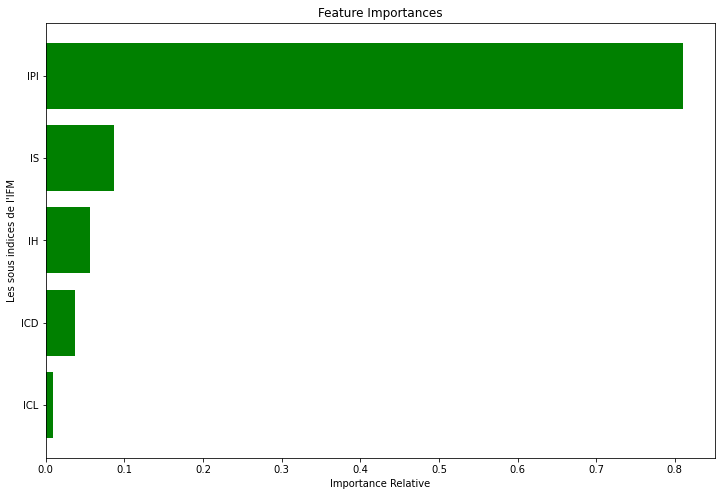

In [26]:
indices = np.argsort(feature_importances)
columns=[]
for i in indices:
    columns.append(X_train.columns.tolist()[i])
plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(columns, feature_importances[indices], color='green', align='center')
plt.xlabel('Importance Relative')
plt.ylabel("Les sous indices de l'IFM")
plt.show()